# 1.4 Bipartite Graphs 

In this notebook, we study **bipartite graphs**, a very important structure in
real-world networks and especially in blockchain (Ethereum).

Goals:

1. Understand the definition of bipartite graphs.
2. Learn how to construct bipartite graphs using NetworkX.
3. Visualize small bipartite examples.
4. Compute basic statistics.
5. Connect bipartite concepts to Ethereum:
   - User ↔ Token Contract
   - User ↔ Smart Contract
   - Liquidity Pools
   - NFT Marketplaces

## 1. Import libraries


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True


## 2. What is a Bipartite Graph?

A **bipartite graph** consists of two disjoint sets of nodes:

- Set U  
- Set V  

such that:

### ❗ No edges exist within the same set  
(e.g., no U–U or V–V edges)

Only **U ↔ V** edges are allowed.

---

## Why bipartite graphs matter?

Many real-world graphs are bipartite:

### 🟦 Social:
- Users ↔ Groups
- Customers ↔ Products

### 🟪 Recommendation systems:
- Users ↔ Movies  
- Users ↔ Items

### 🟧 Blockchain / Ethereum:
- **EOA Addresses ↔ Token Contracts**
- **Users ↔ Smart Contracts**
- **Users ↔ DEX Pools**
- **Traders ↔ NFT Collections**

Later in Module 2 & 3, Ethereum's Token Transfer Graph will use exactly this structure.

NetworkX has native support for bipartite graphs.


## 3. Create a toy bipartite graph

In [2]:
from networkx.algorithms import bipartite

# Define two node sets
users = ["user1", "user2", "user3", "user4"]
tokens = ["USDT", "USDC", "DAI"]

# Create bipartite graph
B = nx.Graph()

# Add nodes with bipartite attribute
B.add_nodes_from(users, bipartite=0)  # left set
B.add_nodes_from(tokens, bipartite=1) # right set

# Add edges (user bought/sent token)
edges = [
    ("user1", "USDT"),
    ("user1", "USDC"),
    ("user2", "USDT"),
    ("user3", "DAI"),
    ("user4", "USDC"),
]

B.add_edges_from(edges)

print("Nodes:", B.number_of_nodes())
print("Edges:", B.number_of_edges())


Nodes: 7
Edges: 5


## 4. Visualize the bipartite graph

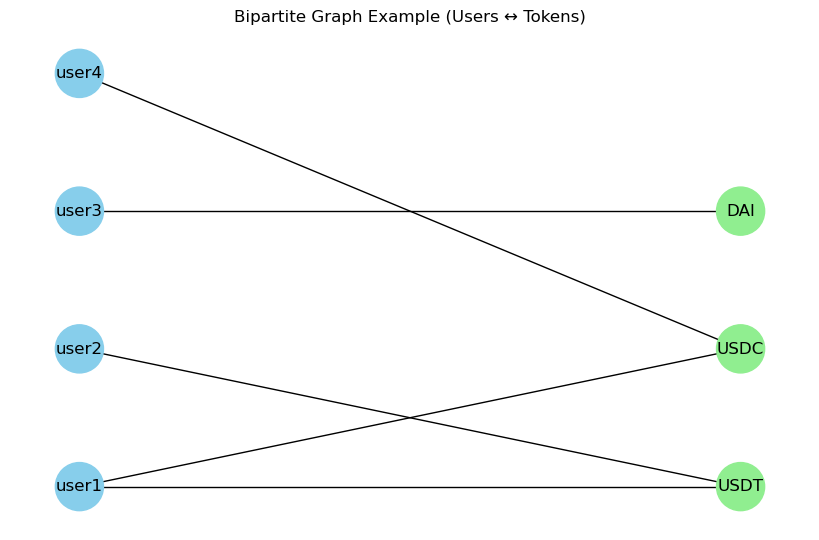

In [3]:
# Separate sets for layout
U = users
V = tokens

pos = dict()

pos.update((node, (0, i)) for i, node in enumerate(U))  # x=0
pos.update((node, (1, i)) for i, node in enumerate(V))  # x=1

nx.draw(
    B, pos, with_labels=True,
    node_size=1200, node_color=["skyblue" if n in U else "lightgreen" for n in B.nodes()]
)

plt.title("Bipartite Graph Example (Users ↔ Tokens)")
plt.show()


## 5. Verify bipartite structure

In [4]:
print("Is bipartite:", bipartite.is_bipartite(B))


Is bipartite: True


## 6. Project bipartite graph into one-mode networks

In [5]:
user_projection = bipartite.projected_graph(B, U)
print("User projection nodes:", user_projection.nodes())
print("User projection edges:", user_projection.edges())


User projection nodes: ['user1', 'user2', 'user3', 'user4']
User projection edges: [('user1', 'user2'), ('user1', 'user4')]


In [6]:
token_projection = bipartite.projected_graph(B, V)
print("Token projection nodes:", token_projection.nodes())
print("Token projection edges:", token_projection.edges())


Token projection nodes: ['USDT', 'USDC', 'DAI']
Token projection edges: [('USDT', 'USDC')]


# 7. Why bipartite structure is important for Ethereum?

Ethereum token transfers naturally form a **bipartite** structure:

### Left side (U):  
EOA addresses (externally owned accounts = users, bots)

### Right side (V):  
Token contracts (USDT, USDC, DAI, WETH…)

Each token transfer is:

$$  
\text{EOA} \longleftrightarrow \text{Token Contract}
$$

Thus, the Token Transfer Network is **not** a simple address–address graph.

It is a **User ↔ Token** bipartite structure.

Later in Module 2:

- We will load token_transfers.csv
- Build bipartite structure:
  - EOA nodes
  - Token nodes
- Edges = token transfers

And we can project:

## 1. EOA–EOA Graph  
Two addresses interact with the same token → community detection

## 2. Token–Token Graph  
Two tokens share many common addresses → DeFi/NFT ecosystem mapping

This helps identify:
- MEV bot group structures  
- Token ecosystem clusters  
- User behavior patterns  
- Cross-token relationships  
